In [1]:
pip install pystan

In [2]:
!pip install fbprophet

In [3]:
import pandas as pd
import fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/st.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,28200,0,0
1,2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,27000,0,0
2,2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,21400,0,0
3,2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,18000,0,0
4,2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17200,0,0


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2758,2021-03-26,48969.250000,49234.660156,48699.910156,49008.500000,10600,0,0
2759,2021-03-30,49331.679688,50268.449219,49331.679688,50136.578125,10500,0,0
2760,2021-03-31,50049.121094,50050.320312,49442.500000,49509.148438,11900,0,0
2761,2021-04-01,49868.531250,50092.480469,49478.531250,50029.828125,8500,0,0
2762,2021-04-05,50020.910156,50028.671875,48580.800781,49159.320312,0,0,0


In [7]:
#here drop last row
df = df.drop([2762,])

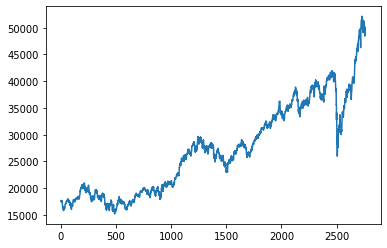

In [8]:
df.Close.plot()

In [9]:
df=df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

In [10]:
#It needs to be change the columns name
df.columns= ['ds', 'y']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2762 entries, 0 to 2761
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2762 non-null   object 
 1   y       2762 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.7+ KB


In [12]:
#convert to datetime
df.ds = pd.to_datetime(df['ds'])

In [13]:
X_train = df[:2210]
X_test = df[2211:]

In [14]:
#model
m = Prophet(daily_seasonality = True)
m.fit(X_train)
future = m.make_future_dataframe(periods=552)
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2757,2020-06-28,44308.299312,34886.540747,53205.310614,34800.579054,53359.385778,-226.059567,-226.059567,-226.059567,-475.193036,-475.193036,-475.193036,59.399087,59.399087,59.399087,189.734382,189.734382,189.734382,0.0,0.0,0.0,44082.239745
2758,2020-06-29,44319.960214,34832.098597,53359.738417,34771.670677,53412.325042,-278.248496,-278.248496,-278.248496,-475.193036,-475.193036,-475.193036,-18.585991,-18.585991,-18.585991,215.530531,215.530531,215.530531,0.0,0.0,0.0,44041.711718
2759,2020-06-30,44331.621116,34459.354461,53390.978149,34743.853988,53465.264306,-271.874624,-271.874624,-271.874624,-475.193036,-475.193036,-475.193036,-38.850067,-38.850067,-38.850067,242.168479,242.168479,242.168479,0.0,0.0,0.0,44059.746491
2760,2020-07-01,44343.282018,34443.288329,53544.680042,34716.417362,53518.203570,-238.493160,-238.493160,-238.493160,-475.193036,-475.193036,-475.193036,-32.746937,-32.746937,-32.746937,269.446814,269.446814,269.446814,0.0,0.0,0.0,44104.788858
2761,2020-07-02,44354.942919,34630.480065,53761.691482,34708.005807,53571.142834,-184.373129,-184.373129,-184.373129,-475.193036,-475.193036,-475.193036,-6.340345,-6.340345,-6.340345,297.160252,297.160252,297.160252,0.0,0.0,0.0,44170.569790


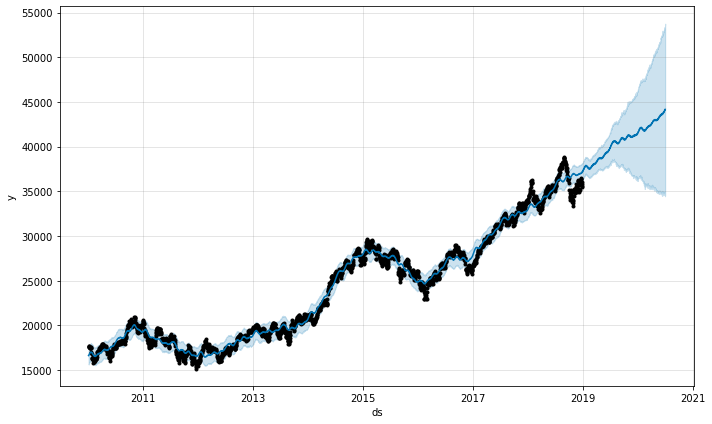

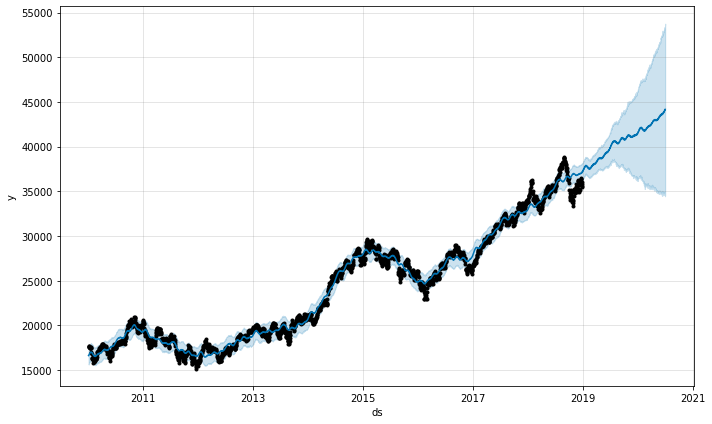

In [15]:
### plot the predicted projection
m.plot(prophet_pred)

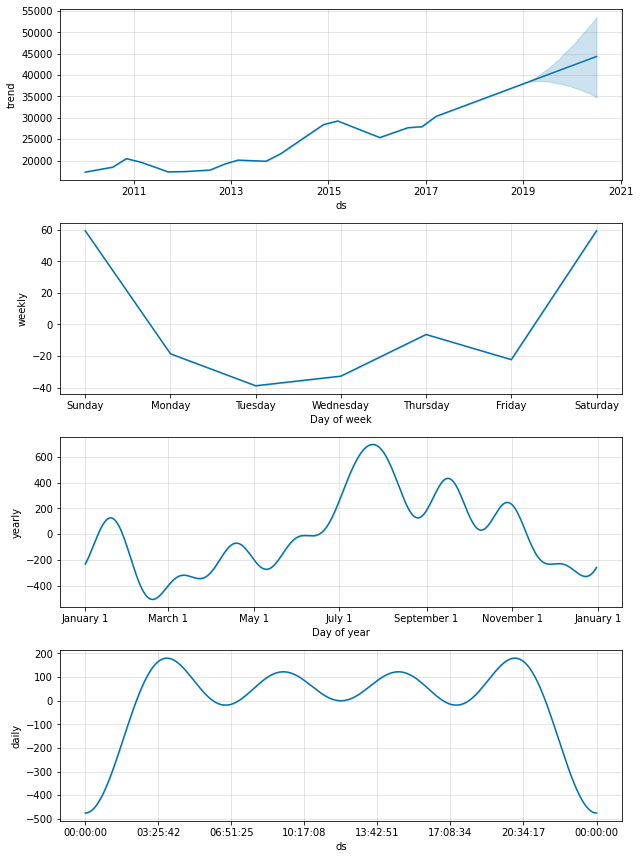

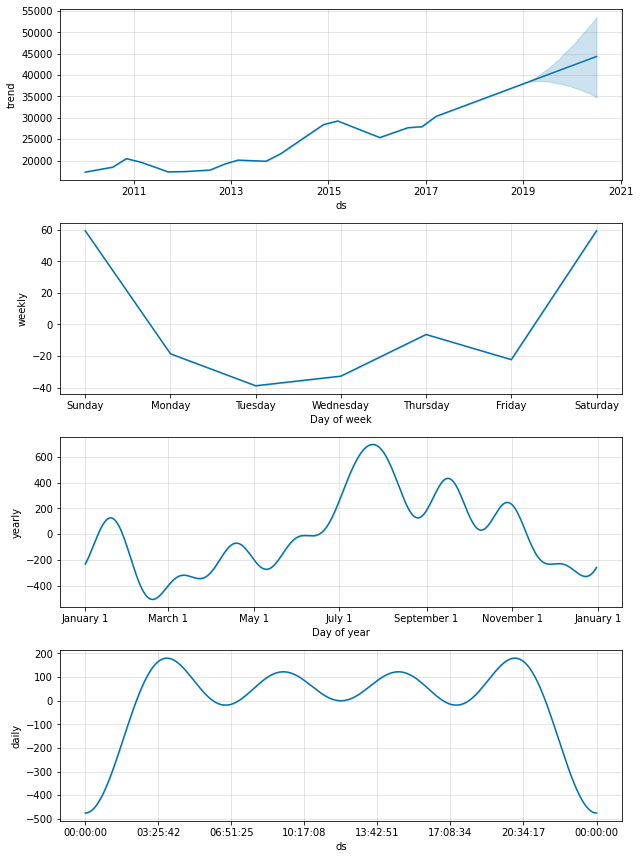

In [16]:
m.plot_components(prophet_pred)

Cross validation

2761 days total dataset

initial = 2210 == size of train dataset

horizon = 552 == size to be forecasted

period = 276 (default = 1/2 of horizon) == spacing between cutoff dates as incremental


In [17]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='2210 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2016-07-06 00:00:00 and 2017-12-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-07-07,25270.199904,24468.841846,26108.549218,27201.490234,2016-07-06
1,2016-07-08,25251.682407,24380.559700,26058.124448,27126.900391,2016-07-06
2,2016-07-11,25197.489916,24362.978125,26074.393816,27626.689453,2016-07-06
3,2016-07-12,25152.002245,24213.933459,26021.603568,27808.140625,2016-07-06
4,2016-07-13,25151.734379,24302.359945,25981.191890,27815.179688,2016-07-06


In [18]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,4.201184e+06,2049.679021,1789.035597,0.059339,0.046327,0.215488
1,37 days,4.377787e+06,2092.316073,1835.366101,0.060932,0.046771,0.198653
2,38 days,4.433416e+06,2105.567967,1857.223275,0.061658,0.049525,0.181818
3,39 days,4.516799e+06,2125.276313,1890.185754,0.062730,0.050638,0.168350
4,40 days,4.503118e+06,2122.055219,1887.456009,0.062588,0.050638,0.168350


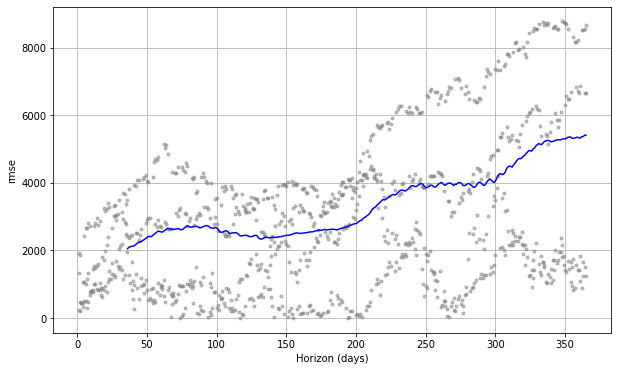

In [19]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')